# Import/Download Packages

In [2]:
%pip install word2number
%pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=f87fa9d11597d9f7dcfb9648fa7be6f64f97d9e6ed4d579a184218bc574760d9
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 8.3 MB/s 
     |████████████████████████████████| 287 kB 19.5 MB/s 


In [3]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split #star
from sklearn.metrics import classification_report #star
from nltk.stem import WordNetLemmatizer
from google.colab import drive
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading and Cleaning Data


In [6]:
df=pd.read_csv('/content/drive/MyDrive/osdg-community-dataset-v2022-04-01.csv',sep='\t')

print('average text length: ', df.text.str.split().str.len().mean().round(2))
print('stdev text length: ', df.text.str.split().str.len().std().round(2))
print('max text length: ', df.text.str.split().str.len().max().round(2))
print('min text length: ', df.text.str.split().str.len().min())


average text length:  89.79
stdev text length:  29.31
max text length:  226
min text length:  16


In [7]:
df

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,8,0.777778
1,10.18356/eca72908-en,00028349a7f9b2485ff344ae44ccfd6b,Labour legislation regulates maximum working h...,11,2,1,0.333333
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,8,0.777778
3,10.1787/5k9b7bn5qzvd-en,0006a887475ccfa5a7f5f51d4ac83d02,The extent to which they are akin to corruptio...,3,1,2,0.333333
4,10.1787/9789264258211-6-en,0006d6e7593776abbdf4a6f985ea6d95,A region reporting a higher rate will not earn...,3,2,2,0.000000
...,...,...,...,...,...,...,...
32322,10.1787/9789264214033-7-en,fff9b6b75bde5397ba26ed1b163ad306,"It also features individual accountability, wh...",4,0,9,1.000000
32323,10.6027/9789289347204-5-en,fffc6ac25f325ab949f92d3563194b3f,Since the full capacity is not likely to be ut...,7,5,4,0.111111
32324,10.1787/9789264186378-8-en,fffe58dae29de6b843aff09b6e2f77f0,Groundwater quality can also be affected by co...,6,0,3,1.000000
32325,10.1787/9789264191761-en,ffff357a454e2d7544f765cf2660e684,Remedier a ces lacunes est la recommandation p...,2,4,5,0.111111


## Dataset Analysis

(array([2733., 2457., 2689., 3740., 4326., 2815., 2992., 1509., 1094.,
        1050., 2277.,  467., 2087., 1126.,  965.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 15 Patch objects>)

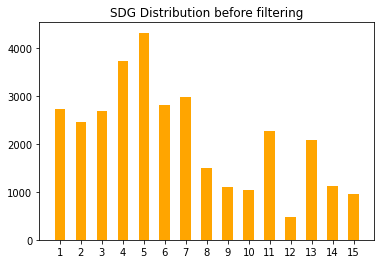

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/osdg-community-dataset-v2022-04-01.csv',sep='\t')

plt.title('SDG Distribution before filtering')
plt.xticks(range(1,17))

plt.hist(df['sdg'], bins=[i for i in range(1,17)], rwidth=0.5, color='orange', align='left')
# df.hist(column = 'sdg', bins=[i for i in range(1,17)], rwidth=0.5, align='left',xticks=range(1,16))


In [10]:
df=pd.read_csv('/content/drive/MyDrive/osdg-community-dataset-v2022-04-01.csv',sep='\t')
conditions = [
    (df['agreement'] >= 0.6) & (df['labels_positive']>df['labels_negative']),
]
choices = [True]
df['quality'] = np.select(conditions,choices, default=False)
# print(df)


df['poor'] = df['quality'] == False

count_sdg = df[['sdg', 'quality','poor']].groupby('sdg', as_index=False).sum()
fig = px.bar(count_sdg, x="sdg", y=['quality', 'poor'], title="Filtering Distribution")
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    ),
    title_x = 0.5
)
fig.show()

(array([1160.,  825., 1862., 2361., 2374., 1336., 1806.,  868.,  682.,
         451., 1294.,  238., 1093.,  750.,  531.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 15 Patch objects>)

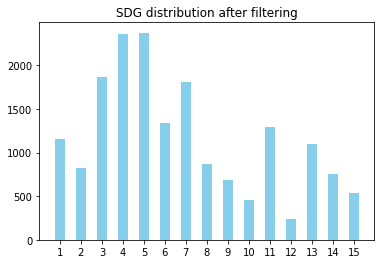

In [11]:
df = df.query('agreement >= .6 and labels_positive > labels_negative').copy()
plt.title('SDG distribution after filtering')
plt.xticks(range(1,17))

plt.hist(df['sdg'], bins=[i for i in range(1,17)], rwidth=0.5, color='skyblue', align='left')
# df.hist(column = 'sdg', bins=[i for i in range(1,17)], rwidth=0.5, align='left',xticks=range(1,16))

In [13]:
df=pd.read_csv('/content/drive/MyDrive/osdg-community-dataset-v2022-04-01.csv',sep='\t')

print('Shape before:', df.shape)
df = df.query('agreement >= .6 and labels_positive > labels_negative').copy()
print('Shape after :', df.shape)
display(df.head())

Shape before: (32327, 7)
Shape after : (17631, 7)


,doi,text_id,text,sdg,labels_negative,labels_positive,agreement
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,8,0.777778
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,8,0.777778
7,10.1787/9789264117563-8-en,000bfb17e9f3a00d4515ab59c5c487e7,The Israel Oceanographic and Limnological Rese...,6,0,3,1.000000
8,10.18356/805b1ae4-en,001180f5dd9a821e651ed51e30d0cf8c,Previous chapters have discussed ways to make ...,2,0,3,1.000000
11,10.1787/9789264310278-en,001f1aee4013cb098da17a979c38bc57,Prescription rates appear to be higher where l...,8,0,3,1.000000


# Train Test Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(df.index.values, 
                                                  df.sdg.values, 
                                                  test_size=0.33, 
                                                  random_state=30, 
                                                  shuffle = True,
                                                  stratify=df.sdg.values)

In [15]:
X_train

array([20165,   659, 24304, ..., 15725,  9732, 24176])

In [ ]:
X_test

array([19129, 24818, 24093, ...,  2334, 14219, 18043])

In [ ]:
Y_train

array([3, 3, 7, ..., 5, 5, 1])

In [ ]:
Y_test

array([ 4,  5, 13, ...,  4,  6, 10])

In [16]:
df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'
df.groupby(['sdg', 'data_type']).count()

doi  text_id  text  labels_negative  labels_positive  \
sdg data_type                                                          
1   test        383      383   383              383              383   
    train       777      777   777              777              777   
2   test        272      272   272              272              272   
    train       553      553   553              553              553   
3   test        615      615   615              615              615   
    train      1247     1247  1247             1247             1247   
4   test        779      779   779              779              779   
    train      1582     1582  1582             1582             1582   
5   test        783      783   783              783              783   
    train      1591     1591  1591             1591             1591   
6   test        441      441   441              441              441   
    train       895      895   895              895              895   
7   test        596      596   596              596              596   
    train      1210     1210  1210             1210             1210   
8   test        286      286   286              286              286   
    train       582      582   582              582              582   
9   test        225      225   225              225              225   
    train       457      457   457              457              457   
10  test        149      149   149              149              149   
    train       302      302   302              302              302   
11  test        427      427   427              427              427   
    train       867      867   867              867              867   
12  test         79       79    79               79               79   
    train       159      159   159              159              159   
13  test        361      361   361              361              361   
    train       732      732   732              732              732   
14  test        248      248   248              248              248   
    train       502      502   502              502              502   
15  test        175      175   175              175              175   
    train       356      356   356              356              356   

               agreement  
sdg data_type             
1   test             383  
    train            777  
2   test             272  
    train            553  
3   test             615  
    train           1247  
4   test             779  
    train           1582  
5   test             783  
    train           1591  
6   test             441  
    train            895  
7   test             596  
    train           1210  
8   test             286  
    train            582  
9   test             225  
    train            457  
10  test             149  
    train            302  
11  test             427  
    train            867  
12  test              79  
    train            159  
13  test             361  
    train            732  
14  test             248  
    train            502  
15  test             175  
    train            356

In [17]:
test_texts = df[df['data_type']=='test']
X_test = test_texts['text']
train_texts = df[df['data_type']=='train']
X_train = train_texts['text']
Y_train = train_texts['sdg']
Y_test = test_texts['sdg']

In [26]:
X_train

0        from gender perspective paulgaard point labour...
2        the average figure also mask large difference ...
7        the israel oceanographic limnological research...
16       for individual outofpocket expense average ave...
18       in present case lcoe calculate include carbon ...
                               ...                        
32309    however adaptation report mandatory paris agre...
32315    moreover certificate label like green key awar...
32316    in mauritius housing development economically ...
32317    in consequence number urban dweller practise o...
32324    groundwater quality also affect contamination ...
Name: text, Length: 11812, dtype: object

# Preprocessing

In [18]:
import string
import re 
import spacy
letters = [' b ',' c ',' d ',' e ',' f ',' g ',' h ',' j ',' k ',' l ',' m ',' n ',' o ',' p ',' q ',' r ',' s ',' t ',' u ',' v ',' w ',' x ',' y ',' z ']
def text_processing(text):
 
    #stop words removal
    ans = text.split()
    ans = [w.lower() for w in ans if w not in stopwords.words('english')]
    ans = ' '.join(ans)
    
    #punctuation removal
    ans = [c for c in ans if c not in string.punctuation]
    ans = ''.join(ans)

    # meaningless letters removal ?
    for c in letters:
       ans = ans.replace(c, ' ')
    
    # Remove URLs
    ans = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', ans, flags=re.MULTILINE)
    ans = re.sub(r"http\S+", " ", ans)
    
    # Remove new line characters
    ans = re.sub('\n', ' ', ans)
    # Remove single quotes
    ans = re.sub("\'", " ", ans) 

    # Remove all numbers and non-alphanumeric characters
    ans = re.sub(r'\d+', ' ', ans) 
    ans = re.sub(r'\W+', ' ', ans) 
    
    return ans

In [19]:
nlp = spacy.load('en_core_web_sm')
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

def get_pos(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return ''



def tokenizer(text):
  words = nltk.word_tokenize(text)
  return words

def spacy_lemmatizer(text):
  doc = nlp(text)
  tokens = []
  for token in doc:
    tokens.append(token)
  lemm_text = lemmatized_sentence = " ".join([token.lemma_ for token in doc])
  return lemm_text

def lemmatizer_with_wordnet(text):
  # tokenize the sentence and find the POS tag for each token
  pos_tagged = nltk.pos_tag(nltk.word_tokenize(text))
  wordnet_tagged = list(map(lambda x: (x[0], get_pos(x[1])), pos_tagged))
  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
      if tag is '':
          # if there is no available tag, append the token as is
          lemmatized_sentence.append(word)
      else:       
          # else use the tag to lemmatize the token
          lemmatized_sentence.append(wordnet_lemmatizer.lemmatize(word, tag))
  lemmatized_sentence = " ".join(lemmatized_sentence)
  return lemmatized_sentence


def joiner(lst):
  return (' ').join(lst)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## Apply preprocessing to train dataset.

In [20]:
# X_train = X_train.apply(lambda text: remove_numbers(text)) 

X_train = X_train.apply(lambda text: text_processing(text))
# X_train = X_train.apply(lambda text: tokenizer(text)) 
X_train = X_train.apply(lambda text: lemmatizer_with_wordnet(text)) 

# X_train = X_train.apply(lambda row: joiner(row))

In [22]:
X_train

0        from gender perspective paulgaard point labour...
2        the average figure also mask large difference ...
7        the israel oceanographic limnological research...
16       for individual outofpocket expense average ave...
18       in present case lcoe calculate include carbon ...
                               ...                        
32309    however adaptation report mandatory paris agre...
32315    moreover certificate label like green key awar...
32316    in mauritius housing development economically ...
32317    in consequence number urban dweller practise o...
32324    groundwater quality also affect contamination ...
Name: text, Length: 11812, dtype: object

## Apply the same preprocessing to test dataset

In [21]:
#tokenizer should be called before the lemmatizer
X_test = X_test.apply(lambda text: text_processing(text))
# X_test = X_test.apply(lambda text: tokenizer(text))
X_test = X_test.apply(lambda text: lemmatizer_with_wordnet(text)) 
# X_test = X_test.apply(lambda row: joiner(row))  #convert tokens into texts again


In [23]:
X_test

8        previous chapter discuss way make food system ...
11       prescription rate appear high labour force par...
12       by contrast share workingage household work ma...
13       parent pay maximum fee kindergarten between to...
25       in last decade particularly since number disch...
                               ...                        
32307    the forest sector forestry wood paper product ...
32312    figure show personal income tax overall tax we...
32313    moreover find people one type poverty socioeco...
32322    it also feature individual accountability mean...
32326    the three disease result great number lose lif...
Name: text, Length: 5819, dtype: object

# Visualisation tools

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

import openpyxl

def plot_confusion_matrix(y_true: np.ndarray, y_hat: np.ndarray, figsize = (16, 9), title = 'Confusion Matrix'):
    """
    Convenience function to display a confusion matrix in a graph.
    """
    labels = sorted(list(set(y_true)))
    df_lambda = pd.DataFrame(
        confusion_matrix(y_true, y_hat),
        index = labels,
        columns = labels
    )
    acc = accuracy_score(y_true, y_hat)
    f1s = f1_score(y_true, y_hat, average = 'weighted')

    fig, ax = plt.subplots(figsize = figsize)
    sns.heatmap(
        df_lambda, annot = True, square = True, cbar = False,
        fmt = 'd', linewidths = .5, cmap = 'YlGnBu',
        ax = ax
    )
    ax.set(
        title = f'Accuracy: {acc:.2f}, F1 (weighted): {f1s:.2f}',
        xlabel = 'Predicted',
        ylabel = 'Actual'
    )
    fig.suptitle(title)
    


# Vectorize

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = CountVectorizer(analyzer=text_processing)


vectorizer = TfidfVectorizer(stop_words='english')
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)
X_train_vectors

<11812x27533 sparse matrix of type '<class 'numpy.float64'>'
	with 480387 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.vocabulary_

# Binary Classification


Binary Classification for sdg 1, SVM
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       884
           1       0.88      0.85      0.87       920

    accuracy                           0.87      1804
   macro avg       0.87      0.87      0.87      1804
weighted avg       0.87      0.87      0.87      1804

Binary Classification for sdg 1, DecisionTree
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       884
           1       0.78      0.80      0.79       920

    accuracy                           0.78      1804
   macro avg       0.78      0.78      0.78      1804
weighted avg       0.78      0.78      0.78      1804

Binary Classification for sdg 1, GauissianNB
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       884
           1       0.76      0.71      0.73       920

    accuracy                           0.74      1804


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 6, DecisionTree
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       933
           1       0.85      0.81      0.83       925

    accuracy                           0.83      1858
   macro avg       0.84      0.83      0.83      1858
weighted avg       0.84      0.83      0.83      1858

Binary Classification for sdg 6, GauissianNB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.76      0.72      0.74       933
           1       0.73      0.77      0.75       925

    accuracy                           0.75      1858
   macro avg       0.75      0.75      0.75      1858
weighted avg       0.75      0.75      0.75      1858



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 6, Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       933
           1       0.95      0.85      0.89       925

    accuracy                           0.90      1858
   macro avg       0.91      0.90      0.90      1858
weighted avg       0.91      0.90      0.90      1858



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 7, SVM
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       994
           1       0.93      0.89      0.91       981

    accuracy                           0.91      1975
   macro avg       0.91      0.91      0.91      1975
weighted avg       0.91      0.91      0.91      1975



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 7, DecisionTree
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       994
           1       0.80      0.83      0.82       981

    accuracy                           0.81      1975
   macro avg       0.81      0.81      0.81      1975
weighted avg       0.81      0.81      0.81      1975

Binary Classification for sdg 7, GauissianNB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.76      0.69      0.72       994
           1       0.71      0.78      0.74       981

    accuracy                           0.73      1975
   macro avg       0.74      0.73      0.73      1975
weighted avg       0.74      0.73      0.73      1975



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 7, Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       994
           1       0.94      0.86      0.89       981

    accuracy                           0.90      1975
   macro avg       0.90      0.90      0.90      1975
weighted avg       0.90      0.90      0.90      1975



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 8, SVM
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       527
           1       0.81      0.84      0.82       469

    accuracy                           0.83       996
   macro avg       0.83      0.83      0.83       996
weighted avg       0.83      0.83      0.83       996



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 8, DecisionTree
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       527
           1       0.67      0.74      0.71       469

    accuracy                           0.71       996
   macro avg       0.71      0.71      0.71       996
weighted avg       0.71      0.71      0.71       996

Binary Classification for sdg 8, GauissianNB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.72      0.65      0.68       527
           1       0.65      0.72      0.68       469

    accuracy                           0.68       996
   macro avg       0.68      0.68      0.68       996
weighted avg       0.69      0.68      0.68       996



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 8, Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       527
           1       0.82      0.83      0.82       469

    accuracy                           0.83       996
   macro avg       0.83      0.83      0.83       996
weighted avg       0.83      0.83      0.83       996



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 9, SVM
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       371
           1       0.87      0.87      0.87       352

    accuracy                           0.87       723
   macro avg       0.87      0.87      0.87       723
weighted avg       0.87      0.87      0.87       723



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 9, DecisionTree
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       371
           1       0.72      0.76      0.74       352

    accuracy                           0.74       723
   macro avg       0.74      0.74      0.74       723
weighted avg       0.74      0.74      0.74       723

Binary Classification for sdg 9, GauissianNB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.74      0.73      0.74       371
           1       0.72      0.73      0.73       352

    accuracy                           0.73       723
   macro avg       0.73      0.73      0.73       723
weighted avg       0.73      0.73      0.73       723

Binary Classification for sdg 9, Logistic Regression


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.88      0.88      0.88       371
           1       0.87      0.88      0.87       352

    accuracy                           0.88       723
   macro avg       0.88      0.88      0.88       723
weighted avg       0.88      0.88      0.88       723

Binary Classification for sdg 10, SVM
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       349
           1       0.84      0.85      0.85       344

    accuracy                           0.85       693
   macro avg       0.85      0.85      0.85       693
weighted avg       0.85      0.85      0.85       693



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 10, DecisionTree
              precision    recall  f1-score   support

           0       0.69      0.72      0.71       349
           1       0.71      0.67      0.69       344

    accuracy                           0.70       693
   macro avg       0.70      0.70      0.70       693
weighted avg       0.70      0.70      0.70       693

Binary Classification for sdg 10, GauissianNB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.73      0.80      0.76       349
           1       0.78      0.70      0.74       344

    accuracy                           0.75       693
   macro avg       0.75      0.75      0.75       693
weighted avg       0.75      0.75      0.75       693

Binary Classification for sdg 10, Logistic Regression


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.82      0.86      0.84       349
           1       0.85      0.81      0.83       344

    accuracy                           0.84       693
   macro avg       0.84      0.84      0.84       693
weighted avg       0.84      0.84      0.84       693

Binary Classification for sdg 11, SVM
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       762
           1       0.90      0.89      0.89       741

    accuracy                           0.90      1503
   macro avg       0.90      0.90      0.90      1503
weighted avg       0.90      0.90      0.90      1503



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 11, DecisionTree
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       762
           1       0.79      0.82      0.81       741

    accuracy                           0.81      1503
   macro avg       0.81      0.81      0.81      1503
weighted avg       0.81      0.81      0.81      1503

Binary Classification for sdg 11, GauissianNB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.77      0.70      0.73       762
           1       0.72      0.78      0.75       741

    accuracy                           0.74      1503
   macro avg       0.74      0.74      0.74      1503
weighted avg       0.74      0.74      0.74      1503



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 11, Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       762
           1       0.92      0.88      0.90       741

    accuracy                           0.90      1503
   macro avg       0.90      0.90      0.90      1503
weighted avg       0.90      0.90      0.90      1503



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 12, SVM
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       158
           1       0.91      0.83      0.87       151

    accuracy                           0.88       309
   macro avg       0.88      0.88      0.88       309
weighted avg       0.88      0.88      0.88       309

Binary Classification for sdg 12, DecisionTree


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.81      0.75      0.78       158
           1       0.76      0.81      0.79       151

    accuracy                           0.78       309
   macro avg       0.78      0.78      0.78       309
weighted avg       0.78      0.78      0.78       309

Binary Classification for sdg 12, GauissianNB
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       158
           1       0.79      0.66      0.72       151

    accuracy                           0.75       309
   macro avg       0.76      0.75      0.75       309
weighted avg       0.76      0.75      0.75       309

Binary Classification for sdg 12, Logistic Regression


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.87      0.91      0.89       158
           1       0.90      0.86      0.88       151

    accuracy                           0.89       309
   macro avg       0.89      0.89      0.89       309
weighted avg       0.89      0.89      0.89       309



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 13, SVM
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       695
           1       0.92      0.89      0.90       683

    accuracy                           0.91      1378
   macro avg       0.91      0.91      0.91      1378
weighted avg       0.91      0.91      0.91      1378



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 13, DecisionTree
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       695
           1       0.83      0.80      0.82       683

    accuracy                           0.82      1378
   macro avg       0.82      0.82      0.82      1378
weighted avg       0.82      0.82      0.82      1378

Binary Classification for sdg 13, GauissianNB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.74      0.80      0.77       695
           1       0.78      0.71      0.74       683

    accuracy                           0.76      1378
   macro avg       0.76      0.76      0.75      1378
weighted avg       0.76      0.76      0.75      1378



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 13, Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       695
           1       0.94      0.85      0.89       683

    accuracy                           0.90      1378
   macro avg       0.90      0.90      0.90      1378
weighted avg       0.90      0.90      0.90      1378

Binary Classification for sdg 14, SVM
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       371
           1       0.97      0.87      0.92       373

    accuracy                           0.92       744
   macro avg       0.93      0.92      0.92       744
weighted avg       0.93      0.92      0.92       744



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 14, DecisionTree
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       371
           1       0.92      0.86      0.88       373

    accuracy                           0.89       744
   macro avg       0.89      0.89      0.89       744
weighted avg       0.89      0.89      0.89       744

Binary Classification for sdg 14, GauissianNB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.79      0.83      0.81       371
           1       0.82      0.78      0.80       373

    accuracy                           0.80       744
   macro avg       0.80      0.80      0.80       744
weighted avg       0.80      0.80      0.80       744

Binary Classification for sdg 14, Logistic Regression


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.87      0.97      0.92       371
           1       0.97      0.86      0.91       373

    accuracy                           0.92       744
   macro avg       0.92      0.92      0.92       744
weighted avg       0.92      0.92      0.92       744

Binary Classification for sdg 15, SVM
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       319
           1       0.94      0.84      0.89       318

    accuracy                           0.89       637
   macro avg       0.90      0.89      0.89       637
weighted avg       0.90      0.89      0.89       637



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Binary Classification for sdg 15, DecisionTree
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       319
           1       0.83      0.81      0.82       318

    accuracy                           0.82       637
   macro avg       0.82      0.82      0.82       637
weighted avg       0.82      0.82      0.82       637

Binary Classification for sdg 15, GauissianNB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.79      0.75      0.77       319
           1       0.76      0.80      0.78       318

    accuracy                           0.77       637
   macro avg       0.77      0.77      0.77       637
weighted avg       0.77      0.77      0.77       637

Binary Classification for sdg 15, Logistic Regression


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



              precision    recall  f1-score   support

           0       0.85      0.94      0.89       319
           1       0.94      0.83      0.88       318

    accuracy                           0.89       637
   macro avg       0.89      0.89      0.89       637
weighted avg       0.89      0.89      0.89       637



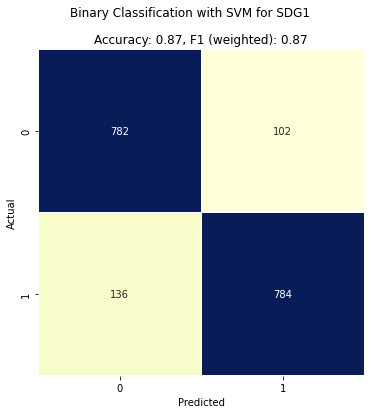

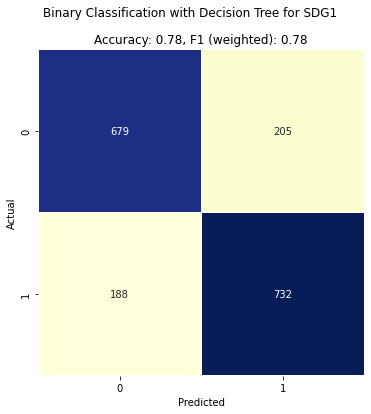

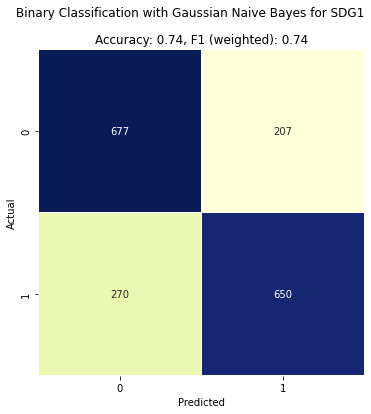

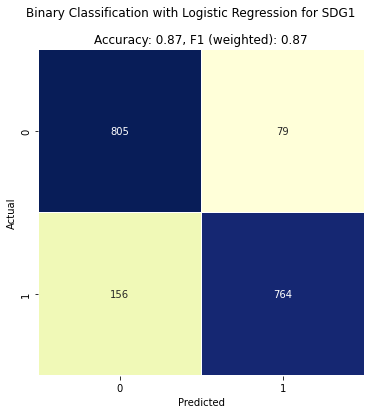

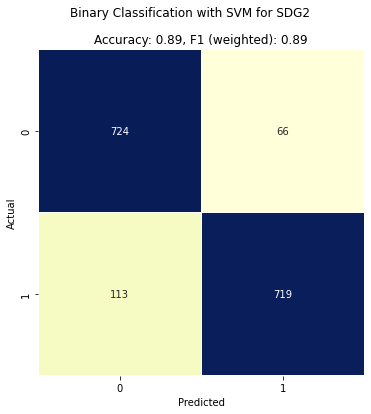

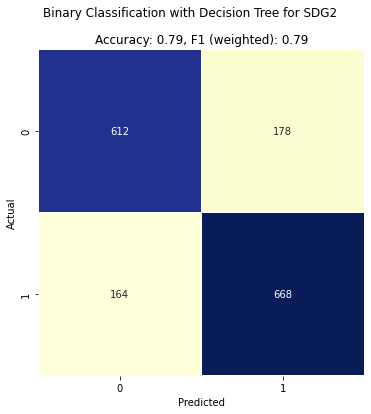

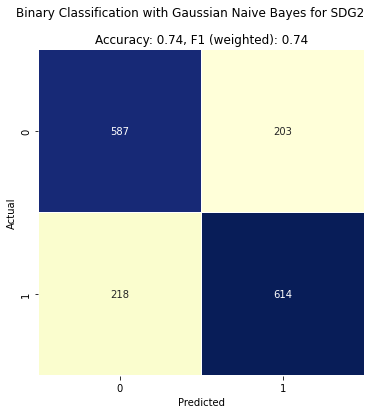

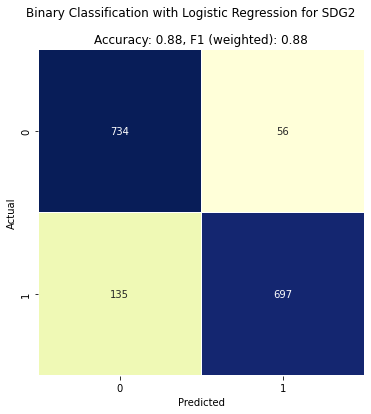

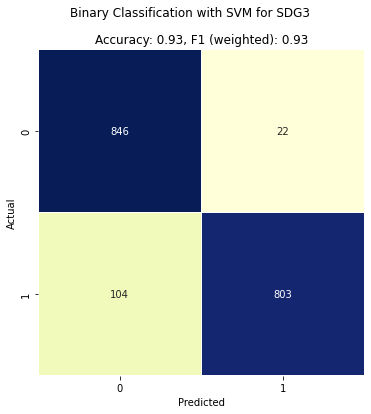

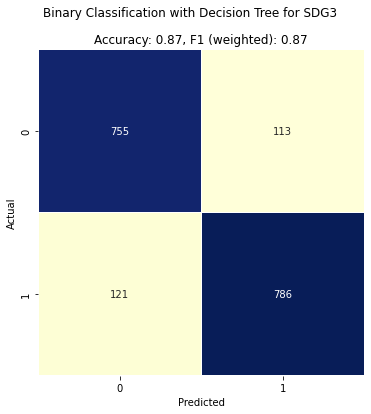

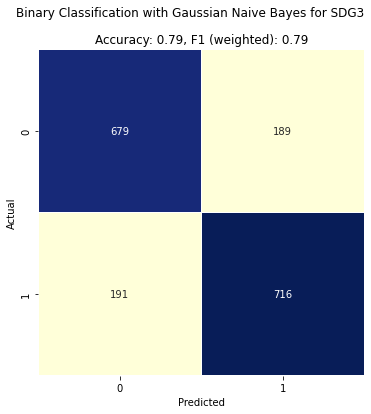

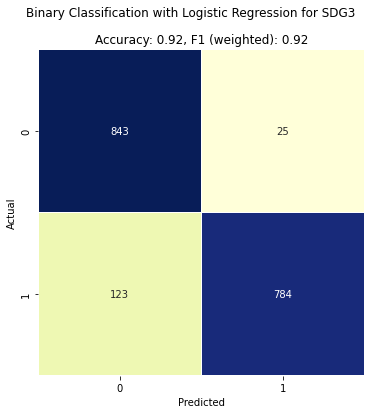

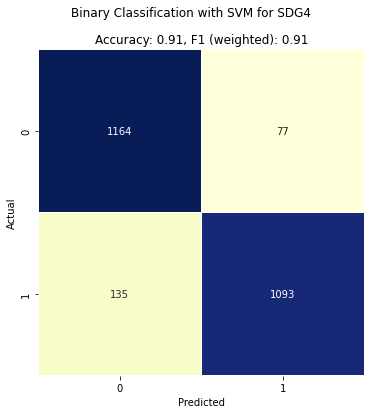

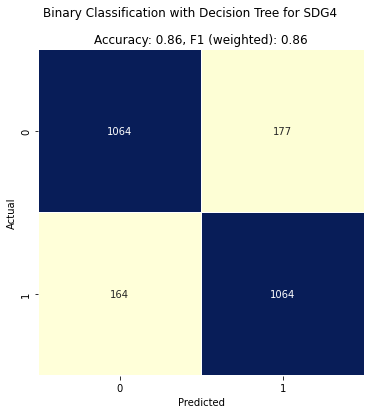

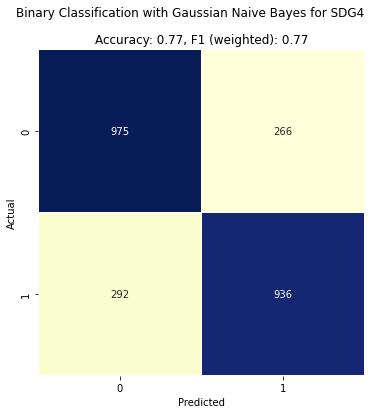

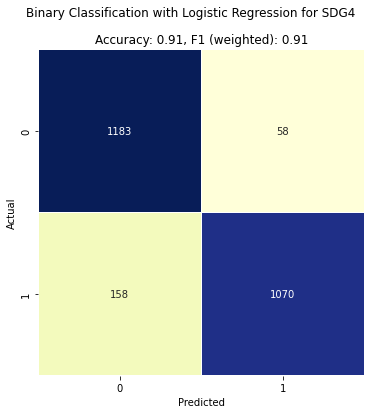

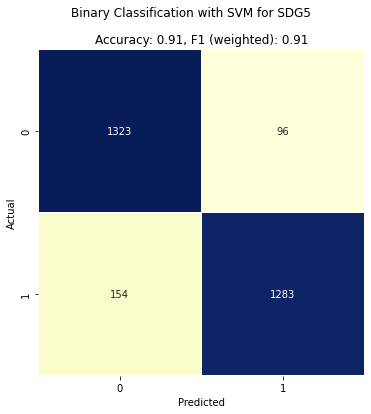

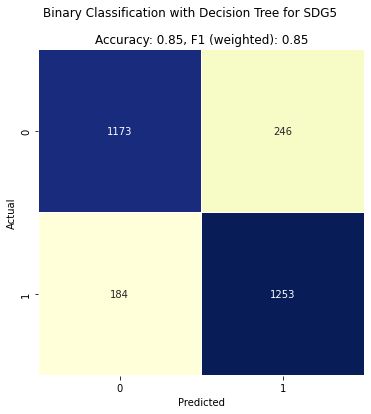

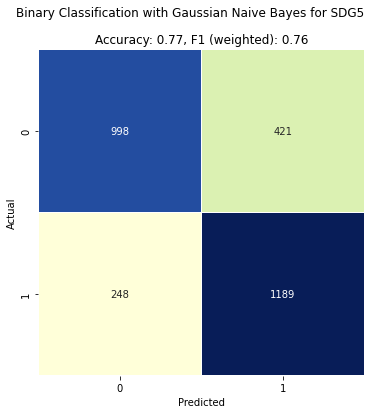

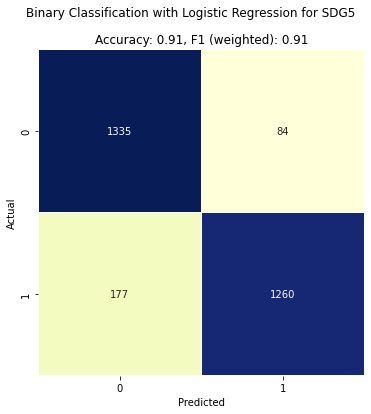

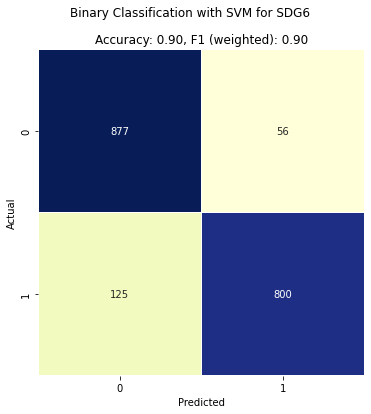

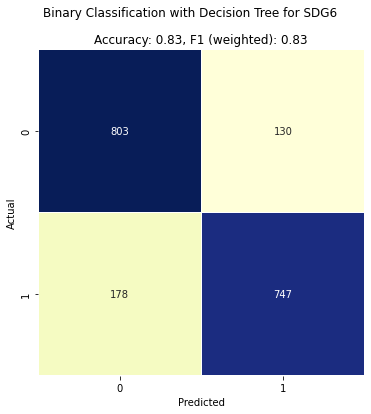

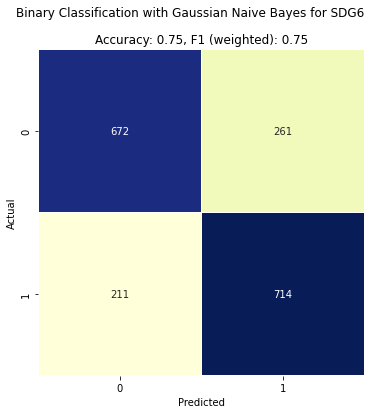

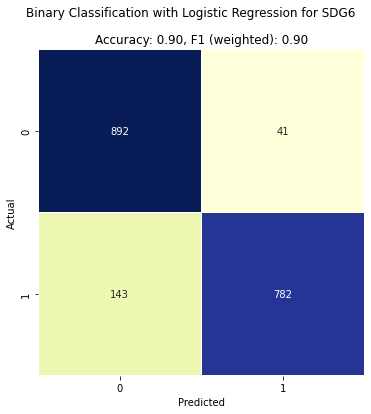

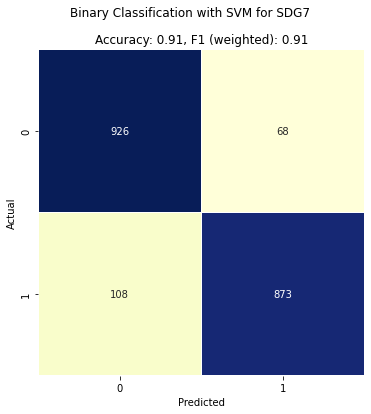

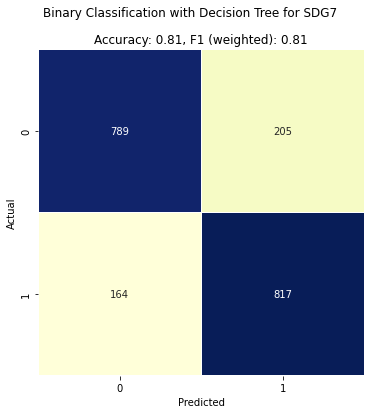

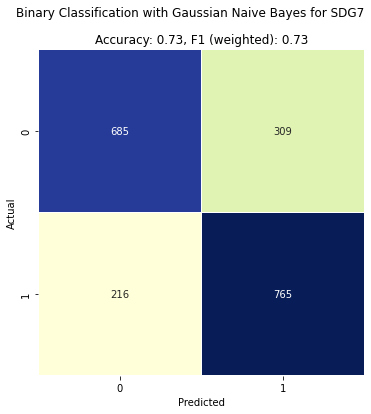

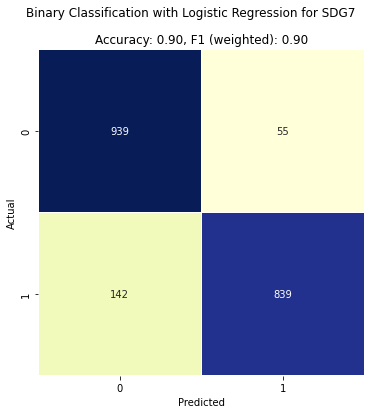

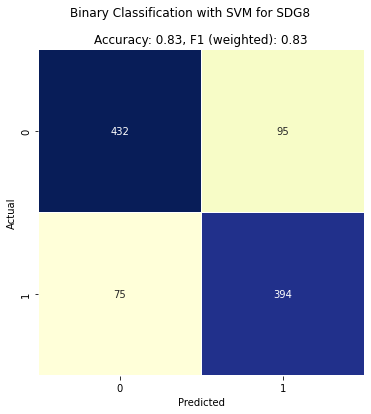

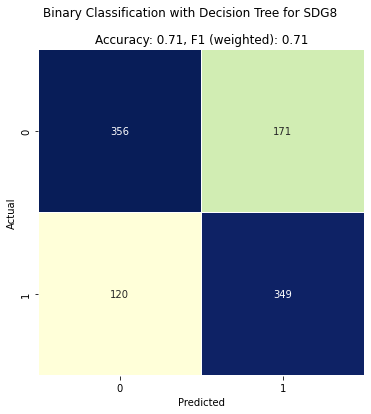

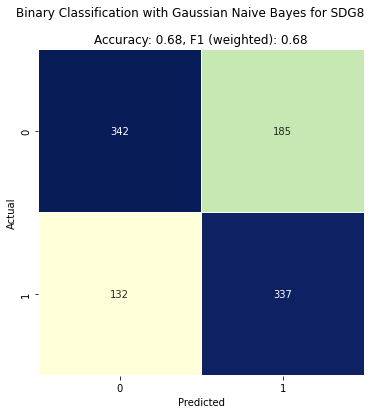

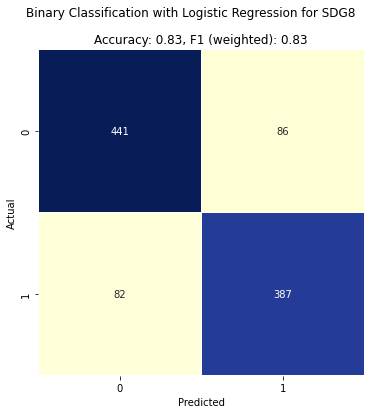

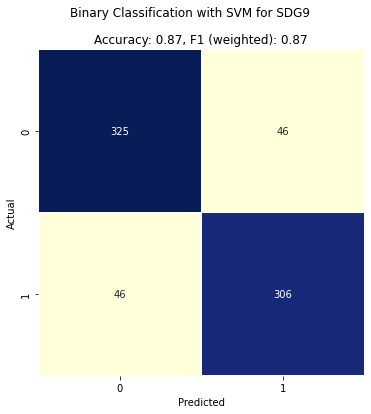

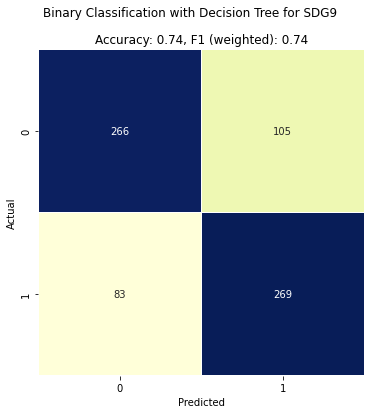

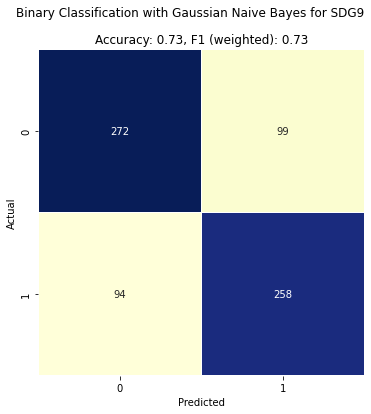

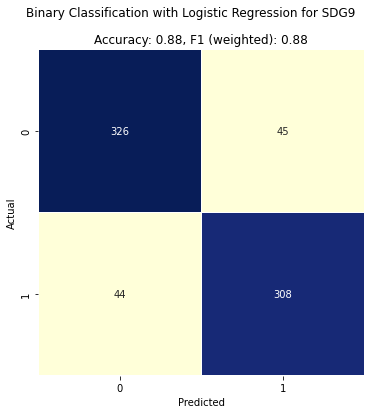

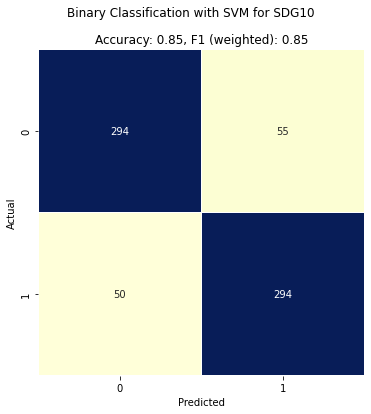

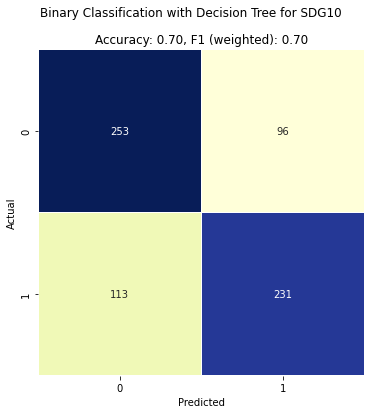

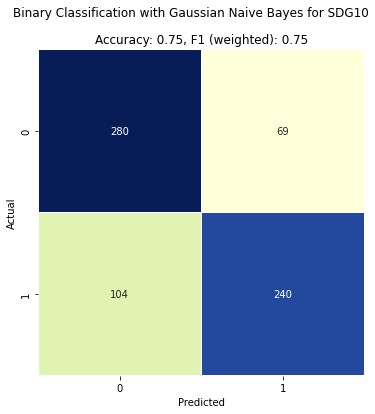

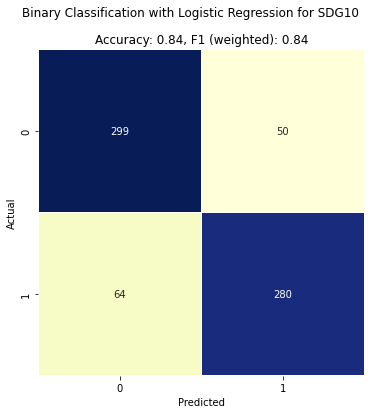

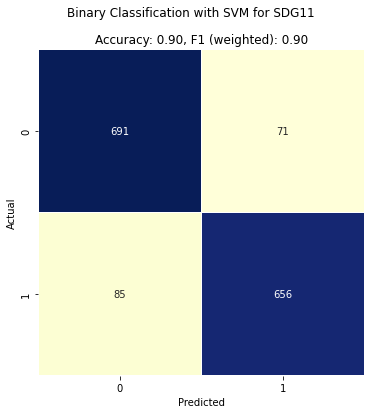

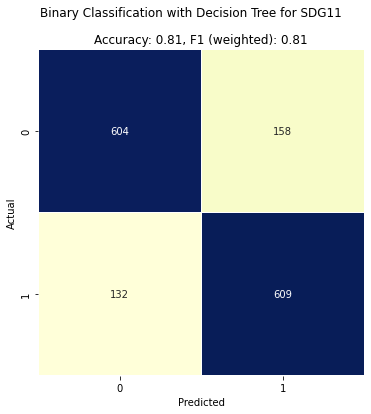

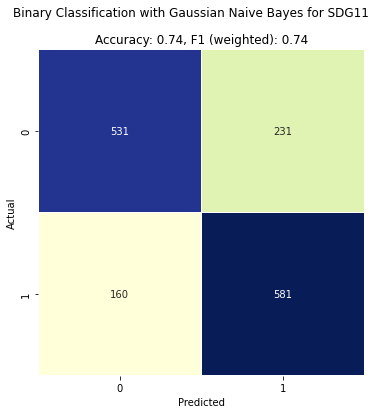

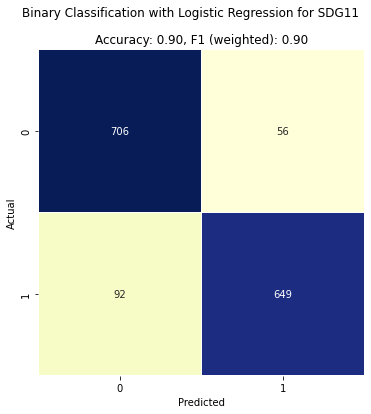

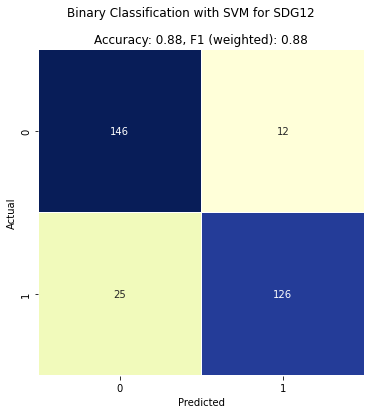

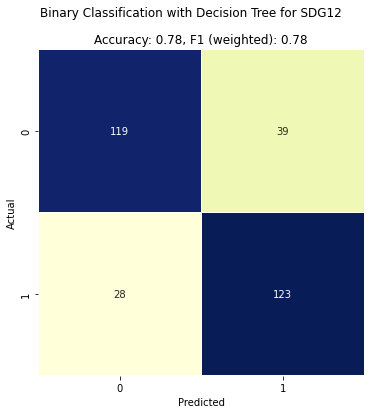

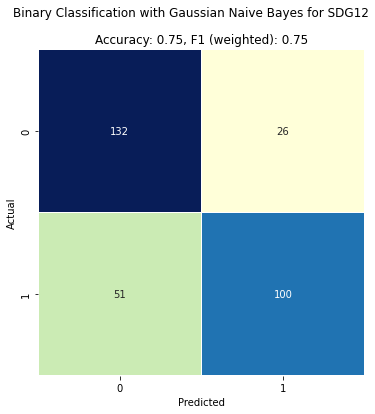

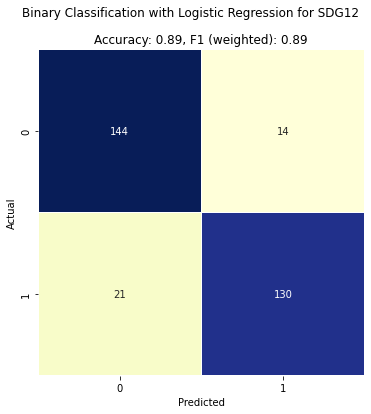

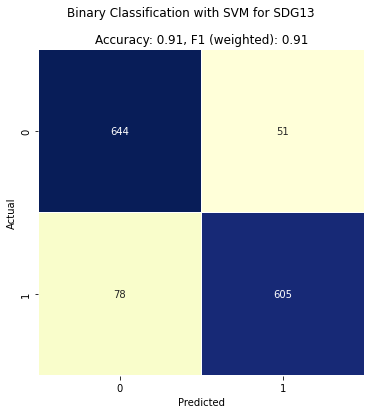

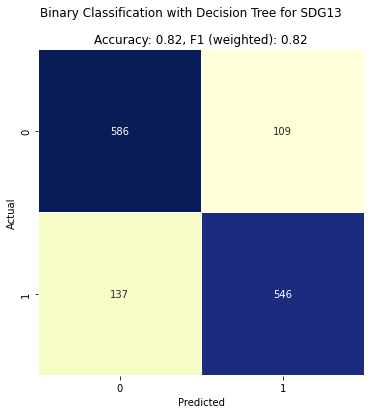

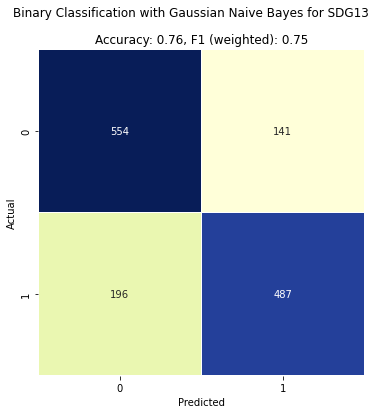

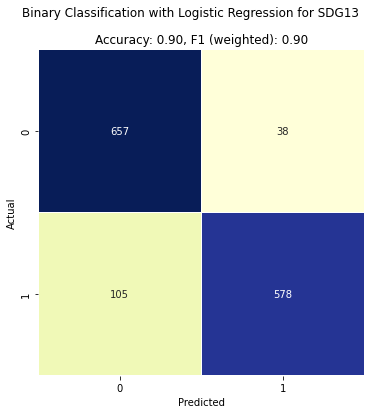

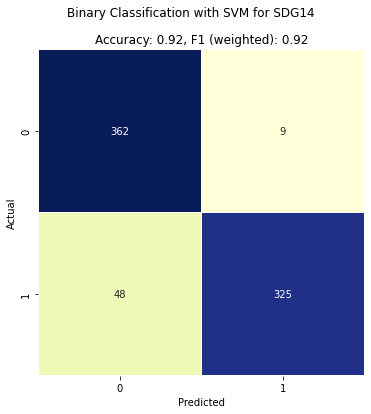

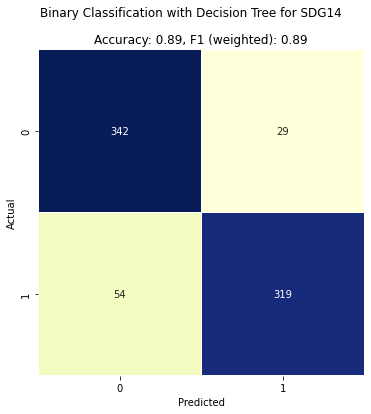

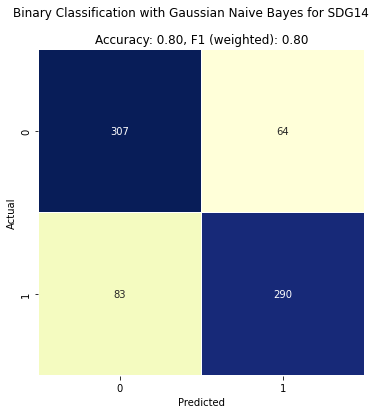

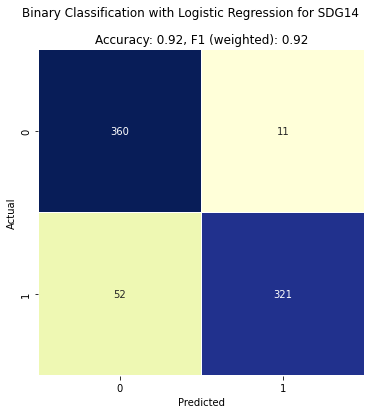

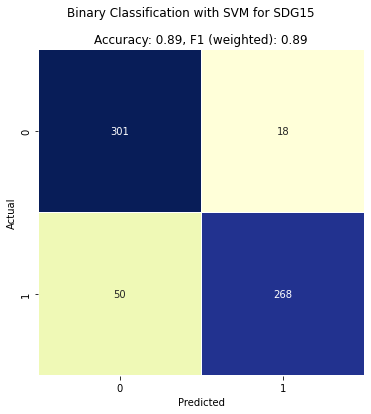

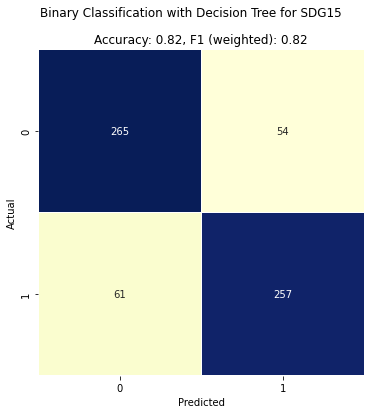

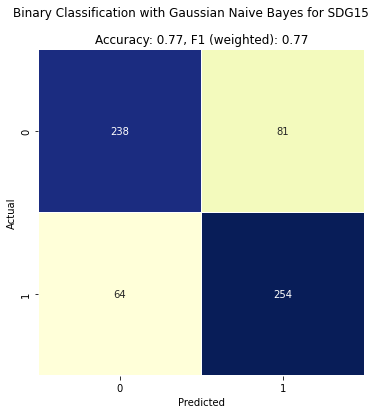

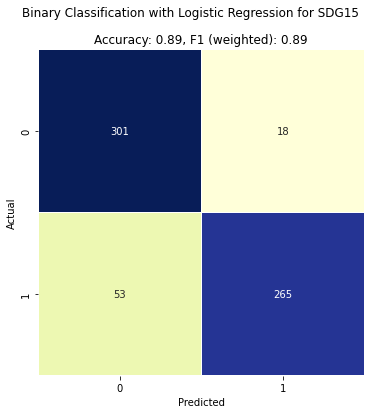

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB


df=pd.read_csv('/content/drive/MyDrive/osdg-community-dataset-v2022-04-01.csv',sep='\t')
for i in range(1,16):
  sdg = i
  mask = df['sdg'].eq(sdg).values
  balanced_df = df.groupby(mask).sample(mask.sum(), random_state = 30)
  balanced_df['label'] = balanced_df['sdg'].eq(sdg)
  balanced_df['label'] = balanced_df['label'].astype(int) # convert true falses to 1 & 0s
  X_train, X_test, Y_train, Y_test, X_agree, Y_agree = train_test_split(balanced_df['text'],balanced_df['label'],balanced_df['agreement'],test_size=0.33,random_state=0,shuffle=True)
  vectorizer = TfidfVectorizer(stop_words='english')
  X_train_vectors = vectorizer.fit_transform(X_train)
  X_test_vectors = vectorizer.transform(X_test)
  X_train_vectors

  print("Binary Classification for sdg " + str(sdg) + ", SVM")
  clf_svm = svm.SVC(kernel='linear')
  clf_svm.fit(X_train_vectors,Y_train)
  report = classification_report(Y_test,clf_svm.predict(X_test_vectors))
  print(report)
  plot_confusion_matrix(Y_test, clf_svm.predict(X_test_vectors), (12, 6),title=f"Binary Classification with SVM for SDG{str(sdg)}")

  print("Binary Classification for sdg " + str(sdg) + ", DecisionTree")
  clf_dec = DecisionTreeClassifier()
  clf_dec.fit(X_train_vectors,Y_train)
  report = classification_report(Y_test,clf_dec.predict(X_test_vectors))
  print(report)
  plot_confusion_matrix(Y_test, clf_dec.predict(X_test_vectors), (12, 6), title=f"Binary Classification with Decision Tree for SDG{str(sdg)}")

  
  print("Binary Classification for sdg " + str(sdg) + ", GauissianNB")
  clf_gnb = GaussianNB()
  clf_gnb.fit(X_train_vectors.toarray(),Y_train)
  report = classification_report(Y_test,clf_gnb.predict(X_test_vectors.toarray()))
  print(report)
  plot_confusion_matrix(Y_test, clf_gnb.predict(X_test_vectors.toarray()), (12, 6), title=f"Binary Classification with Gaussian Naive Bayes for SDG{str(sdg)}")

  print("Binary Classification for sdg " + str(sdg) + ", Logistic Regression")
  clf_log = LogisticRegression(random_state=0)
  clf_log.fit(X_train_vectors,Y_train)
  report = classification_report(Y_test,clf_log.predict(X_test_vectors))  
  print(report)
  plot_confusion_matrix(Y_test, clf_log.predict(X_test_vectors), (12, 6), title=f"Binary Classification with Logistic Regression for SDG{str(sdg)}")




# Multiclass Training & Classification

## SVM Results

              precision    recall  f1-score   support

           1     0.8375    0.8747    0.8557       383
           2     0.8897    0.8603    0.8748       272
           3     0.9116    0.9561    0.9333       615
           4     0.9429    0.9756    0.9590       779
           5     0.9291    0.9374    0.9332       783
           6     0.9210    0.9252    0.9231       441
           7     0.8955    0.9060    0.9008       596
           8     0.6546    0.6958    0.6746       286
           9     0.7873    0.7733    0.7803       225
          10     0.7634    0.4765    0.5868       149
          11     0.8465    0.8782    0.8621       427
          12     0.8511    0.5063    0.6349        79
          13     0.8886    0.8615    0.8748       361
          14     0.9617    0.9113    0.9358       248
          15     0.8807    0.8857    0.8832       175

    accuracy                         0.8850      5819
   macro avg     0.8641    0.8283    0.8408      5819
weighted avg     0.8843   

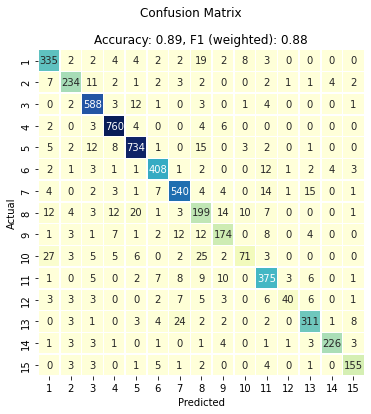

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train_vectors,Y_train, sample_weight=None)
report = classification_report(Y_test,clf_svm.predict(X_test_vectors), digits=4)
# print(report)



# df = pd.DataFrame(report).transpose()
# df.to_excel('/content/drive/MyDrive/classification_report.xlsx',sheet_name="SVM")


print(report)
plot_confusion_matrix(Y_test, clf_svm.predict(X_test_vectors), (12, 6))

## Linear Support Vector Classification Results

              precision    recall  f1-score   support

           1     0.8371    0.8721    0.8542       383
           2     0.8949    0.9081    0.9015       272
           3     0.9253    0.9463    0.9357       615
           4     0.9300    0.9718    0.9504       779
           5     0.9263    0.9476    0.9369       783
           6     0.9217    0.9342    0.9279       441
           7     0.9003    0.9094    0.9048       596
           8     0.7185    0.6783    0.6978       286
           9     0.7917    0.7600    0.7755       225
          10     0.7474    0.4765    0.5820       149
          11     0.8408    0.8782    0.8591       427
          12     0.8367    0.5190    0.6406        79
          13     0.8895    0.8698    0.8796       361
          14     0.9512    0.9435    0.9474       248
          15     0.8750    0.8800    0.8775       175

    accuracy                         0.8885      5819
   macro avg     0.8658    0.8330    0.8447      5819
weighted avg     0.8861   

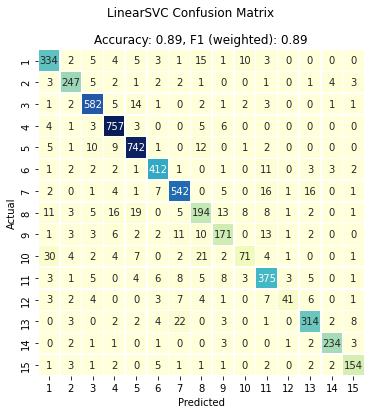

In [ ]:
  from sklearn import svm
  clf_svm = svm.LinearSVC()
  clf_svm.fit(X_train_vectors,Y_train)
  report = classification_report(Y_test,clf_svm.predict(X_test_vectors),digits=4)
  print(report)
  plot_confusion_matrix(Y_test, clf_svm.predict(X_test_vectors), (12, 6), title="LinearSVC Confusion Matrix")

## Decision Tree Results

              precision    recall  f1-score   support

           1     0.6917    0.7441    0.7170       383
           2     0.6095    0.6140    0.6117       272
           3     0.8413    0.8276    0.8344       615
           4     0.8662    0.8806    0.8733       779
           5     0.8479    0.8685    0.8580       783
           6     0.8442    0.8481    0.8462       441
           7     0.7920    0.7668    0.7792       596
           8     0.4260    0.4126    0.4192       286
           9     0.4619    0.4311    0.4460       225
          10     0.3946    0.3893    0.3919       149
          11     0.6815    0.6815    0.6815       427
          12     0.3288    0.3038    0.3158        79
          13     0.7125    0.7756    0.7427       361
          14     0.8276    0.7742    0.8000       248
          15     0.6323    0.5600    0.5939       175

    accuracy                         0.7417      5819
   macro avg     0.6639    0.6585    0.6607      5819
weighted avg     0.7399   

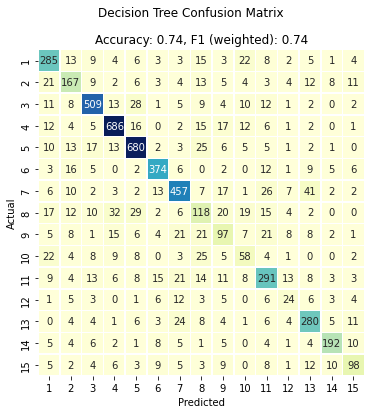

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dec = DecisionTreeClassifier()
clf_dec.fit(X_train_vectors,Y_train)

report = classification_report(Y_test,clf_dec.predict(X_test_vectors),digits=4)
# print(report)
# df = pd.DataFrame(report).transpose()

# df.to_excel('/content/drive/MyDrive/classification_report.xlsx',sheet_name="DecisionTree")
# with pd.ExcelWriter('/content/drive/MyDrive/classification_report.xlsx', engine='openpyxl', mode='a') as writer: 
#      df.to_excel(writer) 




print(report)
plot_confusion_matrix(Y_test, clf_dec.predict(X_test_vectors), (12, 6),title="Decision Tree Confusion Matrix")

## GaussianNB Results

              precision    recall  f1-score   support

           1     0.5575    0.4178    0.4776       383
           2     0.6098    0.4596    0.5241       272
           3     0.6756    0.7821    0.7249       615
           4     0.7006    0.7240    0.7121       779
           5     0.5659    0.7292    0.6373       783
           6     0.6033    0.5828    0.5928       441
           7     0.5843    0.7097    0.6409       596
           8     0.3813    0.3427    0.3610       286
           9     0.5484    0.3778    0.4474       225
          10     0.3974    0.2081    0.2731       149
          11     0.5347    0.6136    0.5714       427
          12     0.9167    0.1392    0.2418        79
          13     0.6000    0.5734    0.5864       361
          14     0.7537    0.6169    0.6785       248
          15     0.7117    0.4514    0.5524       175

    accuracy                         0.6027      5819
   macro avg     0.6094    0.5152    0.5348      5819
weighted avg     0.6046   

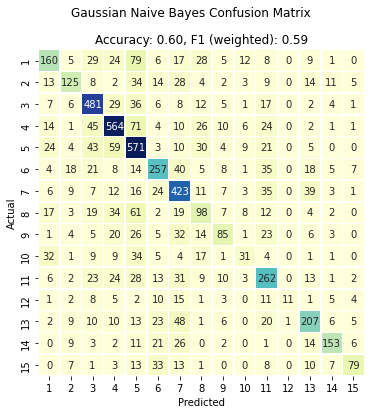

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_vectors.toarray(),Y_train)
report = classification_report(Y_test,clf_gnb.predict(X_test_vectors.toarray()), digits = 4)
# df = pd.DataFrame(report).transpose()
# with pd.ExcelWriter('/content/drive/MyDrive/classification_report.xlsx', engine='openpyxl', mode='a') as writer: 
#      df.to_excel(writer) 
print(report)
plot_confusion_matrix(Y_test, clf_gnb.predict(X_test_vectors.toarray()), (12, 6),title="Gaussian Naive Bayes Confusion Matrix")

## Logistic Regression Results

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           1     0.8500    0.8433    0.8467       383
           2     0.8889    0.8529    0.8705       272
           3     0.8930    0.9496    0.9204       615
           4     0.9202    0.9769    0.9477       779
           5     0.9064    0.9527    0.9290       783
           6     0.9271    0.9229    0.9250       441
           7     0.8644    0.9094    0.8863       596
           8     0.6871    0.6678    0.6773       286
           9     0.7772    0.6978    0.7354       225
          10     0.7765    0.4430    0.5641       149
          11     0.8093    0.8946    0.8498       427
          12     0.8889    0.3038    0.4528        79
          13     0.8750    0.8338    0.8539       361
          14     0.9582    0.9234    0.9405       248
          15     0.9068    0.8343    0.8690       175

    accuracy                         0.8749      5819
   macro avg     0.8619    0.8004    0.8179      5819
weighted avg     0.8734   

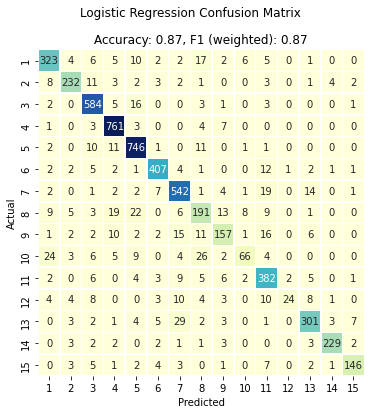

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=0)
clf_log.fit(X_train_vectors,Y_train)
report = classification_report(Y_test,clf_log.predict(X_test_vectors), digits = 4)
#df = pd.DataFrame(report).transpose()
# with pd.ExcelWriter('/content/drive/MyDrive/classification_report.xlsx', engine='openpyxl', mode='a') as writer: 
#      df.to_excel(writer) 
print(report)
plot_confusion_matrix(Y_test, clf_log.predict(X_test_vectors), (12, 6),title="Logistic Regression Confusion Matrix")

## Multiclass Classification using BERT-LARGE

In [ ]:
"""# Multiclass classification using BERT."""


import pandas as pd
import numpy as np
import transformers

from transformers import BertTokenizer, BertForSequenceClassification
import torch
from tqdm.notebook import tqdm
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split #star
from sklearn.metrics import classification_report #star
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import f1_score
import random

df=pd.read_csv('osdg-community-dataset-v2022-04-01.csv',sep='\t')
df = df.query('agreement >= .6 and labels_positive > labels_negative').copy()
X_train, X_test, Y_train, Y_test = train_test_split(df.index.values, 
                                                  df.sdg.values, 
                                                  test_size=0.33, 
                                                  random_state=0, 
                                                  stratify=df.sdg.values)

possible_labels = df.sdg.unique()
# maybe trying to convert 1..15 into 0..14 (sdg labels)?

df['sdg']-=1

df['sdg'].max()

# because the labels are imbalanced, we split the data set in a stratified fashion.


df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'
df.groupby(['sdg', 'data_type']).count()

tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', 
                                          do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True,
    truncation=True, 
    max_length=512, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='test'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True,
    truncation=True, 
    max_length=512, 
    return_tensors='pt'
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].sdg.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='test'].sdg.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

model = BertForSequenceClassification.from_pretrained("bert-large-uncased",
                                                      num_labels=15,
                                                      output_attentions=False,
                                                      output_hidden_states=False)


batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)


optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5  #try 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

label_dict = {}
for i in range(1,16):
  label_dict[str(i)]=i
print(label_dict)
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')


seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
print(device)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_large_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')


## Multiclass Classification Using RoBERTa

In [ ]:
import pandas as pd
import numpy as np
import transformers

from transformers import BertTokenizer, BertForSequenceClassification, RobertaTokenizer, RobertaForSequenceClassification
import torch
from tqdm.notebook import tqdm
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split #star
from sklearn.metrics import classification_report #star
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import f1_score
import random

df=pd.read_csv('osdg-community-dataset-v2022-04-01.csv',sep='\t')
df = df.query('agreement >= .6 and labels_positive > labels_negative').copy()
X_train, X_test, Y_train, Y_test = train_test_split(df.index.values, 
                                                  df.sdg.values, 
                                                  test_size=0.33, 
                                                  random_state=0, 
                                                  stratify=df.sdg.values)


possible_labels = df.sdg.unique()
# maybe trying to convert 1..15 into 0..14 (sdg labels)?

df['sdg']-=1

df['sdg'].max()

# because the labels are imbalanced, we split the data set in a stratified fashion.


df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'
df.groupby(['sdg', 'data_type']).count()

tokenizer = RobertaTokenizer.from_pretrained('roberta-large', 
                                          do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True,
    truncation=True, 
    max_length=512, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='test'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True,
    truncation=True, 
    max_length=512, 
    return_tensors='pt'
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].sdg.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='test'].sdg.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

model = RobertaForSequenceClassification.from_pretrained("roberta-large",
                                                      num_labels=15,
                                                      output_attentions=False,
                                                      output_hidden_states=False)


batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)


optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5  #try 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

label_dict = {}
for i in range(1,16):
  label_dict[str(i)]=i
print(label_dict)
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')


seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
print(device)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_roberta_large_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')


## Load-evaluate RoBERTa


In [ ]:
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import transformers

from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
from tqdm.notebook import tqdm
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split #star
from sklearn.metrics import classification_report #star
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import f1_score
import random

df=pd.read_csv('osdg-community-dataset-v2022-04-01.csv',sep='\t')
df = df.query('agreement >= .6 and labels_positive > labels_negative').copy()
X_train, X_test, Y_train, Y_test = train_test_split(df.index.values, 
                                                  df.sdg.values, 
                                                  test_size=0.33, 
                                                  random_state=0, 
                                                  stratify=df.sdg.values)
#to_categorical converts Y's into 16-value arrays which has 1 at index Y, 0 otherwise.
#ex: Y_train first row: 6
#to_categorical[0] = array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      # dtype=float32)

possible_labels = df.sdg.unique()
# maybe trying to convert 1..15 into 0..14 (sdg labels)?

df['sdg']-=1

df['sdg'].max()

# because the labels are imbalanced, we split the data set in a stratified fashion.


df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'
df.groupby(['sdg', 'data_type']).count()

tokenizer = RobertaTokenizer.from_pretrained('roberta-large', 
                                          do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True,
    truncation=True, 
    max_length=512, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='test'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True,
    truncation=True, 
    max_length=512, 
    return_tensors='pt'
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].sdg.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='test'].sdg.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

model = RobertaForSequenceClassification.from_pretrained("roberta-large",
                                                      num_labels=15,
                                                      output_attentions=False,
                                                      output_hidden_states=False)


batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)


def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')


batch_size = 3
device = torch.device('cpu')
label_dict = {}
for i in range(15):
  label_dict["SDG-" + str(i+1)] = i
model = RobertaForSequenceClassification.from_pretrained("roberta-large",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

model.load_state_dict(torch.load('finetuned_roberta_large_epoch_5.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)
predictions_son = np.argmax(predictions, axis=1).flatten()
true_vals_son = true_vals.flatten()
son_df = pd.DataFrame(list(zip(predictions_son, true_vals_son)),
               columns =['Predictions', 'Labels'])
son_df.to_csv('roberta.csv')

# Multiclass classification using BERT.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
# df=pd.read_csv('/content/drive/MyDrive/osdg-community-data-v2022-01-01.csv',sep='\t')
df=pd.read_csv('/content/drive/MyDrive/osdg-community-dataset-v2022-04-01.csv',sep='\t')

In [ ]:

print('average text length: ', df.text.str.split().str.len().mean())
print('stdev text length: ', df.text.str.split().str.len().std())
print('max text length: ', df.text.str.split().str.len().max())

average text length:  91.38613805229426
stdev text length:  29.353086663268847
max text length:  226


1297

In [ ]:
from sklearn.model_selection import train_test_split #star
from sklearn.metrics import classification_report #star
#X_train, X_test, Y_train, Y_test, X_agree, Y_agree = train_test_split(df['text'],df['sdg'],df['agreement'],test_size=0.33,random_state=0,shuffle=True)
df = df.query('agreement >= .6 and labels_positive > labels_negative').copy()
X_train, X_test, Y_train, Y_test = train_test_split(df.index.values, 
                                                  df.sdg.values, 
                                                  test_size=0.33, 
                                                  random_state=0, 
                                                  stratify=df.sdg.values)

In [ ]:
X_train

array([ 8889, 19486, 12627, ..., 19980, 31181, 10467])

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
#to_categorical converts Y's into 16-value arrays which has 1 at index Y, 0 otherwise.
#ex: Y_train first row: 6
#to_categorical[0] = array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      # dtype=float32)

y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [ ]:
!pip install transformers
import transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 101 kB 11.4 MB/s 
     |████████████████████████████████| 596 kB 56.6 MB/s 
     |████████████████████████████████| 6.6 MB 42.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from tqdm.notebook import tqdm
from torch.utils.data import TensorDataset

In [ ]:
possible_labels = df.sdg.unique()
# maybe trying to convert 1..15 into 0..14 (sdg labels)? 

In [ ]:
possible_labels

array([ 5,  3,  6,  2,  8,  4,  7, 10, 11, 13,  1, 15, 12,  9, 14])

In [ ]:
df['sdg']-=1

In [ ]:
df['sdg'].max()

14

In [ ]:
from sklearn.model_selection import train_test_split
# because the labels are imbalanced, we split the data set in a stratified fashion.

df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'
df.groupby(['sdg', 'data_type']).count()


doi  text_id  text  labels_negative  labels_positive  \
sdg data_type                                                          
0   test        383      383   383              383              383   
    train       777      777   777              777              777   
1   test        272      272   272              272              272   
    train       553      553   553              553              553   
2   test        615      615   615              615              615   
    train      1247     1247  1247             1247             1247   
3   test        779      779   779              779              779   
    train      1582     1582  1582             1582             1582   
4   test        783      783   783              783              783   
    train      1591     1591  1591             1591             1591   
5   test        441      441   441              441              441   
    train       895      895   895              895              895   
6   test        596      596   596              596              596   
    train      1210     1210  1210             1210             1210   
7   test        286      286   286              286              286   
    train       582      582   582              582              582   
8   test        225      225   225              225              225   
    train       457      457   457              457              457   
9   test        149      149   149              149              149   
    train       302      302   302              302              302   
10  test        427      427   427              427              427   
    train       867      867   867              867              867   
11  test         79       79    79               79               79   
    train       159      159   159              159              159   
12  test        361      361   361              361              361   
    train       732      732   732              732              732   
13  test        248      248   248              248              248   
    train       502      502   502              502              502   
14  test        175      175   175              175              175   
    train       356      356   356              356              356   

               agreement  
sdg data_type             
0   test             383  
    train            777  
1   test             272  
    train            553  
2   test             615  
    train           1247  
3   test             779  
    train           1582  
4   test             783  
    train           1591  
5   test             441  
    train            895  
6   test             596  
    train           1210  
7   test             286  
    train            582  
8   test             225  
    train            457  
9   test             149  
    train            302  
10  test             427  
    train            867  
11  test              79  
    train            159  
12  test             361  
    train            732  
13  test             248  
    train            502  
14  test             175  
    train            356

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True, 
    truncation=True,
    max_length=512, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='test'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True,
    truncation=True, 
    max_length=512, 
    return_tensors='pt'
)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].sdg.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='test'].sdg.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=15,
                                                      output_attentions=False,
                                                      output_hidden_states=False)


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5  #try 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from sklearn.metrics import f1_score
label_dict = {}
for i in range(1,16):
  label_dict[str(i)]=i
print(label_dict)
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

{'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15}


In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'content/drive/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

cpu


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/3938 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
label_dict = {}
for i in range(15):
  label_dict["SDG-" + str(i+1)] = i

label_dict

{'SDG-1': 0,
 'SDG-10': 9,
 'SDG-11': 10,
 'SDG-12': 11,
 'SDG-13': 12,
 'SDG-14': 13,
 'SDG-15': 14,
 'SDG-2': 1,
 'SDG-3': 2,
 'SDG-4': 3,
 'SDG-5': 4,
 'SDG-6': 5,
 'SDG-7': 6,
 'SDG-8': 7,
 'SDG-9': 8}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import openpyxl
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


def plot_confusion_matrix(y_true: np.ndarray, y_hat: np.ndarray, figsize = (16, 9)):
    """
    Convenience function to display a confusion matrix in a graph.
    """
    labels = sorted(list(set(y_true)))
    df_lambda = pd.DataFrame(
        confusion_matrix(y_true, y_hat),
        index = labels,
        columns = labels
    )
    acc = accuracy_score(y_true, y_hat)
    f1s = f1_score(y_true, y_hat, average = 'weighted')

    fig, ax = plt.subplots(figsize = figsize)
    sns.heatmap(
        df_lambda, annot = True, square = True, cbar = False,
        fmt = 'd', linewidths = .5, cmap = 'YlGnBu',
        ax = ax
    )
    ax.set(
        title = f'Accuracy: {acc:.2f}, F1 (weighted): {f1s:.2f}',
        xlabel = 'Predicted',
        ylabel = 'Actual'
    )
    fig.suptitle('Confusion Matrix')

In [ ]:
!pip install transformers
import transformers
from transformers import BertTokenizer, BertForSequenceClassification
import torch

                                               

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import transformers

from transformers import BertTokenizer, BertForSequenceClassification
import torch
from tqdm.notebook import tqdm
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split #star
from sklearn.metrics import classification_report #star
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import f1_score
import random

df=pd.read_csv('/content/drive/MyDrive/osdg-community-dataset-v2022-04-01.csv',sep='\t')
df = df.query('agreement >= .6 and labels_positive > labels_negative').copy()
X_train, X_test, Y_train, Y_test = train_test_split(df.index.values,
                                                  df.sdg.values,
                                                  test_size=0.33,
                                                  random_state=0,
                                                  stratify=df.sdg.values)
#to_categorical converts Y's into 16-value arrays which has 1 at index Y, 0 otherwise.
#ex: Y_train first row: 6
#to_categorical[0] = array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      # dtype=float32)

y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

possible_labels = df.sdg.unique()
# maybe trying to convert 1..15 into 0..14 (sdg labels)?

df['sdg']-=1

df['sdg'].max()

# because the labels are imbalanced, we split the data set in a stratified fashion.


df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'
df.groupby(['sdg', 'data_type']).count()

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='test'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].sdg.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='test'].sdg.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=15,
                                                      output_attentions=False,
                                                      output_hidden_states=False)


batch_size = 3

dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler=SequentialSampler(dataset_val),
                                   batch_size=batch_size)
def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')



Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
device = torch.device('cpu')
label_dict = {}
for i in range(15):
  label_dict["SDG-" + str(i+1)] = i
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

model.load_state_dict(torch.load(f'/content/drive/MyDrive/finetuned_BERT_v2_epoch_5.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)
# plot_confusion_matrix(true_vals, predictions)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
predictions

NameError: ignored